# MATH2750 R Practical Report - Markov Chains

Before beginning our report, it is worth noting that code explanation will be seen in hashtags (#) in any code sections.

## Question 1
 In this question we are asked to analyse a $N=50$ step Markov Chain with a transition matrix for $\epsilon = 0.2$. In order to do this, we must input the following code to create functions for the transition matrix and Markov Chain:

In [5]:
# # Produces a transition matrix for a Markov chain based on a parameter eps
TransMat <- function(eps) {
  matrix(c(0.1, 0.9,   0,       0,       0,   0,
           0.4, 0.2, 0.4,       0,       0,   0,
             0, 0.5,   0,     0.5,       0,   0,
             0,   0, 0.5, 0.5-eps,     eps,   0,
             0,   0,   0,     eps, 0.3-eps, 0.7,
             0,   0,   0,       0,     0.5, 0.5),
         nrow = 6, ncol = 6, byrow = TRUE)
}

# Simulates a Markov chain with transition matrix P for N steps from X0
MarkovChain <- function(N, X0, P) {
  X <- numeric(N)   # empty vector of length N
  space <- nrow(P)  # number of points in sample space
  
  now <- X0
  for (n in 1:N) {
    now <- sample(space, 1, prob = P[now, ])
    X[n] <- now
  }
  X
}

Now we have these two functions defined, we can assign our variables. We assign $\epsilon$ to $0.2$ and $N$ to $50$, the values stated in the question. We then assign our transition matrix for $\epsilon$ as '$P$' and begin our Markov Chain from $X_0 = 1$. Finally, we input all these assigned variables into our X vector; the Markov Chain vector for our specific values. Altogether, we get the code:

In [6]:
eps <- 0.2  # epsilon is our stated value 
P   <- TransMat(eps)   # P is our transition matrix for our specified epsilon
N   <- 50   # N is our number of steps but we will vary this throughout our investigation
X0  <- 1     # X0 gives the starting point of our Markov Chain 
X   <- MarkovChain(N, X0, P)   # X is the vector of our specific Markov Chain 

Now we plot our Markov Chain to observe any behaviour in its sequence. Remembering that our Markov Chain begins at $1$, we input the following code to create our graph:

In [7]:
options(repr.plot.width = 4.5, repr.plot.height = 4.5) # Scales our graph 
plot(0:N, c(1, X),    # Plots from 1 up to N
     type = "b",       
     col  = "blue",
     xlab = bquote("Time Step, N =" ~ .(N)),
     ylim = c(1, 6),    # We set the y limit between 1 and 6 as we know that we won't get any values above or below this
     ylab = bquote("Markov Chain, " ~ X[n]), 
     main = bquote("Markov Chain with ϵ =" ~ .(eps)))

We simulate different Markov Chain vectors all of length 50 and repeat the plotting. Doing so, we notice that for a transition matrix with $\epsilon = 0.2$, the Markov Chain, on average, stops at every state over its $50$ steps. Each graph generated by the different Markov Chains often reach all of the six states. We could argue that this is due to the $ϵ$ value not being sufficiently small; there is *still* a probability that the Markov Chain will reach every state along the way as our $\epsilon$ value is not negligibly small.

## Question 2

We now examine the proportion of time spent in each of the six states. First, we consider how many times the Markov Chain reaches a particular state. We can do this with the following code:

In [8]:
num_visits <- table(factor(X, 1:6))  #creates a table from state 1 to 6 with number of visits to each state 
num_visits


 1  2  3  4  5  6 
 2  7 10  9  9 13 

From this, we observe that the Markov Chain does indeed cross every state at least once. To calculate the proportion of time in each state, we simply divide by our $N$ value. In this case $N = 50$ so we input the following:

In [9]:
proportion_time <- num_visits/N #dividing through by our N value
proportion_time


   1    2    3    4    5    6 
0.04 0.14 0.20 0.18 0.18 0.26 

This gives the proportion of time spent in each state. In order to observe the behaviour of the Markov Chain, we plot the proportion of time spent in each state against the stationary distribution. This will allow us to observe any obvious patterns in the Markov Chain whilst also enabling us to predict the outcome of the proportion time for large values of $N$. We will compare the difference between the Markov Chain proportion time and the stationary distribution using a bar chart. We therfore input the following code:

In [10]:
# Finds the stationary distribution of a Markov chain
StatDist <- function(P) {
  LeftEigen <- eigen(t(P))
  statmeas <- LeftEigen$vectors[, 1]  # Unnormalised stationary measure
  statmeas / sum(statmeas)            # Normalised stationary distribution
}

# Plotting our Barchart
options(repr.plot.width = 8, repr.plot.height = 4.5)  # Setting the size of the bar chart
stationary <- StatDist(P)         # defining the stationary distribution 
rbind(proportion_time, stationary)   # Combining proportion time and the stationary distribution
barplot(rbind(proportion_time, stationary), beside = TRUE,   # Creating the bar chart
        col  = c("red","blue"),
        xlab = "States",
        ylab = "Overall Time Spent at Particular State",
        main = bquote("Proportion of Time Spent for" ~ .(N) ~ "Steps"),
        legend.text = c("Proportion of Time", "Stationary Distribution")
)

,1,2,3,4,5,6
proportion_time,0.04000000,0.1400000,0.2000000,0.1800000,0.1800000,0.2600000
stationary,0.08952551,0.2014324,0.1611459,0.1611459,0.1611459,0.2256043


From first observation, we notice that for $N=50$, the proportion of time doesn't follow a stationary distribution and that the proportion of time varies between states for different randomly generated Markov Chains. This appears intuitive as we have a sufficiently small $N$ value. So, to further extend our investigation, we increase the value of $N$ and observe any change. We expect that the proportion time will tend towards a stationary distribution for large $N$ as a result of *Ergodic's Theorem*. This tells us that when the number of steps, $N,$ of an irreducible finite-state Markov chain is very large, then the proportion of time spent in each state tends to the stationary distribution.

We input the same code as above but for $N=1000$ and $N=1,000,000$ and observe the behaviour.

Fig A | Fig B
- | - 
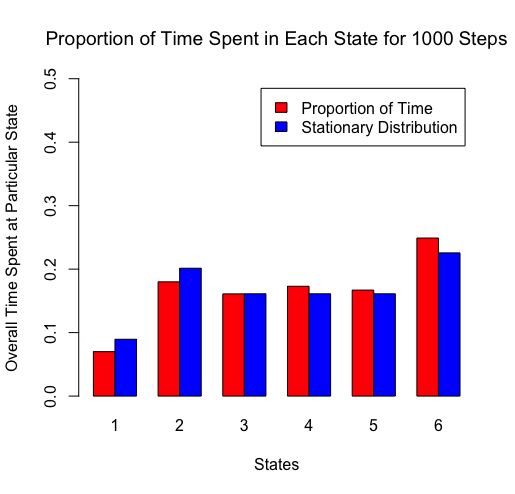 | 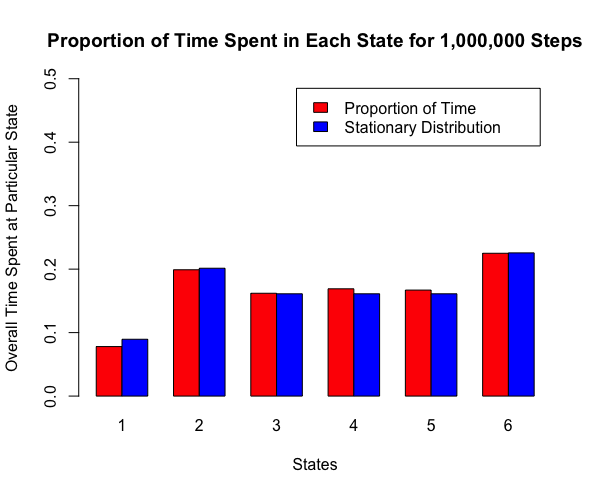

** I'm using images from my own computer so full pictures won't show - they are present on the pdf attachment ** We observe a significant difference between the two bar charts as $N$ increases. The proportion of time tends towards a stationary distribution as N increases. So we can conclude that increasing the number of steps in the Markov Chain results in the proportion of time in each state reaches a stationary distribution. 

## Question 3

 For this question, we are asked to estimate the expected return time $µ_i$ and comment on what we expect the answer to be. Before inputting any code, we must recall the definition of *expected return time* as seen in Lecture 8. The definition is as follows:

First we define the return time:
<h3 align="center"> <font size="3"> $M_i = min\{n \in \{1,2,...\} : X_n = i\}$

 From this, it follows that the expected return time is defined as:
<h3 align="center"> <font size="3"> $\mu_i = \mathbb E (M_i | X_0 = i)$

Using this definition, we can input code to compute the expected return time for each of our states. Then, to get the expected return time, we take the difference between the numbers produced using the *which* command (so we can observe how frequently they occur) and take the mean of this vector. Altogether, we get the following code:

In [11]:
expected_return <- function(vector, value){   # Creating a function for a specific state and a specific vector
    visit <- which(vector == value)   # which entries correspond to the particular inputted value
    return_time <- diff(visit)   # Computing the difference between these entries
    mean(return_time) # Taking the mean 
}

<font size="3"> This creates a function that produces the expected return time for a specific state and a specific vector. We can extend this further to return the expected return time for all states for a vector:

In [12]:
expected_return_times <- sapply(1:6, expected_return, vector = X) # This gives the expected return time for each of the six states

<font size="3"> Now we have defined our expected return time function, we can use it to compare to other results used in lectures. Specifically, for an irreducible finite-state Markov chain, the stationary distribution $\pi_i$ and the expected return times $\mu_i$ are related by $\pi_i = 1/\mu_i$. We could observe whether this pattern holds for our data by inputting the following code and varying the value of $N$. We begin with $N=50$:

In [13]:
eps <- 0.2     # Assigning our values again
P   <- TransMat(eps)
N   <- 50
X0  <- 1
X   <- MarkovChain(N, X0, P)
expected_return_times <- sapply(1:6, expected_return, vector = X)
barplot(rbind(1/expected_return_times,stationary), beside = TRUE,  # Creating a barchart 
         col = c("red","blue"),
         xlab = "States",
         ylab = "Expected Return Times",
         main = bquote("Expected Return Time vs Stationary Distribution for" ~.(N)~ "Steps"),
         legend.text = c("1/µ", "Stationary Distribution")
 )

<font size="3"> Immediately we observe little correlation between the expected return time and the stationary distribution. However, we extend our study further by increasing the value of $N$ and observing any behaviour. We choose a sufficiently large $N$ value at $N = 100,000$:

In [14]:
eps <- 0.2
P   <- TransMat(eps)
N   <- 100000
X0  <- 1
X   <- MarkovChain(N, X0, P)
expected_return_times <- sapply(1:6, expected_return, vector = X)
barplot(rbind(1/expected_return_times,stationary), beside = TRUE,
         col = c("red","blue"),
         xlab = "States",
         ylab = "Expected Return Times",
         main = "Expected Return Time vs Stationary Distribution for 100,000 Steps",
         legend.text = c("1/µ", "Stationary Distribution")
 )

<font size="3"> After repeated trials of varying the value of $N$, we observe that, as $N$ is increased to a sufficiently large value, the expected return time reaches a stationary distribution. We expected to observe this behaviour after what we have learnt in Lecture 10 and by our relation between the two as stated above. 

## Question 4

<font size="3">We are now asked to comment on how our findings above would change if our epsilon value was decreased to $\epsilon = 0.01$ or $\epsilon = 0.000001$ or even $\epsilon = 0$. The best way to visualise the effects these smaller epsilon values will have on our overall Markov Chain is to compute a diagram. For our particular transition matrix we have the following diagram:

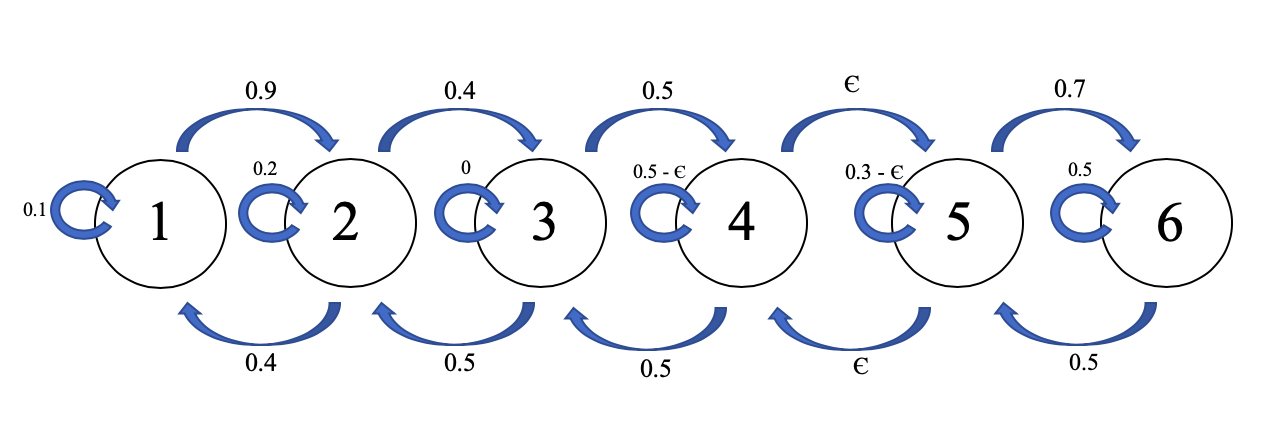 

<font size="3"> Observing the diagram we notice that our epsilon value doesn't affect the probability between states until we reach state four. From then, we notice that the probability of moving from state four to state five is $\epsilon$ and similarly from state five to state four. Epsilon also plays a role in the transition from state four to four and from state five to five. However, as epsilon tends towards zero this doesn't have any effect on their probability (they stay at 0.5 and 0.3 respectively). However, the probability from state four to state five and the probability from state five to state four tends towards 0. This means that there is no probability of the Markov Chain reaching beyond state four. Or similarly, if the Markov Chain started at state five or state six then there is no probability of the Markov Chain reaching state four. Overall, for choosing very small epsilon values, we would expect the Markov chain (where $X_0 = 1$) to reach only states one, two, three and four. 